<a href="https://colab.research.google.com/github/Junaid-EEE11/coursework/blob/main/breast%20cancer_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Import libraries

In [102]:
# Load libraries
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [106]:
from google.colab import files
uploaded = files.upload()
import io
wiscon_data=pd.read_csv(io.BytesIO(uploaded['wiscon_data.csv']))
wiscon_data.head()

Saving wiscon_data.csv to wiscon_data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [120]:
wiscon_data.groupby('diagnosis').count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,0
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,0


In [146]:
scaler=StandardScaler()
X = wiscon_data.drop(['Unnamed: 32','diagnosis','id'],axis = 1)
X=scaler.fit_transform(X)

y = wiscon_data['diagnosis'].map({'M':1,'B':0})

if len(y)>2*len(y[y==1].index):
  print("number of 'B' is large")
  new=random.choices(y[y==1].index,k=len(y)-2*len(y[y==1].index))
else:
  print("number of 'M' is large")
  new=random.choices(y[y==0].index,k=len(y)-2*len(y[y==0].index))

X_new=X[new]
Y_new=y[new]
X= np.vstack([X, X_new])
y=pd.concat([y,Y_new], ignore_index=True)

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
if len(Y_train)>2*len(Y_train[Y_train==1].index):
  new1=random.choices(Y_train[Y_train==1].index,k=len(Y_train)-2*len(Y_train[Y_train==1].index))
else:
  new1=random.choices(Y_train[Y_train==0].index,k=len(Y_train)-2*len(Y_train[Y_train==0].index))

X_new1=X[new1]
Y_new1=Y_train[new1]
X_train= np.vstack([X_train, X_new1])
Y_train=pd.concat([Y_train,Y_new1],ignore_index=True)

number of 'B' is large


In [150]:
model=GaussianNB()
model.fit(X_train,Y_train)
GaussianNB(priors=None, var_smoothing=1e-09)
predictionsNB = model.predict(X_validation)
print('Classification Report:\n',classification_report(Y_validation, predictionsNB))
print('Confusion Matrix:\n',confusion_matrix(Y_validation,predictionsNB))
print('Accuracy Score:',accuracy_score(Y_validation,predictionsNB))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        66
           1       0.95      0.92      0.93        77

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

Confusion Matrix:
 [[62  4]
 [ 6 71]]
Accuracy Score: 0.9300699300699301


### Summarize the data

In [ ]:
# summarize the data
print(df_bc.shape)
# head
display(df_bc.head(5))
# descriptions
display(df_bc.describe())
# class distribution
display(df_bc.groupby('class').size())

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


class
0    212
1    357
dtype: int64

### Data Visualization

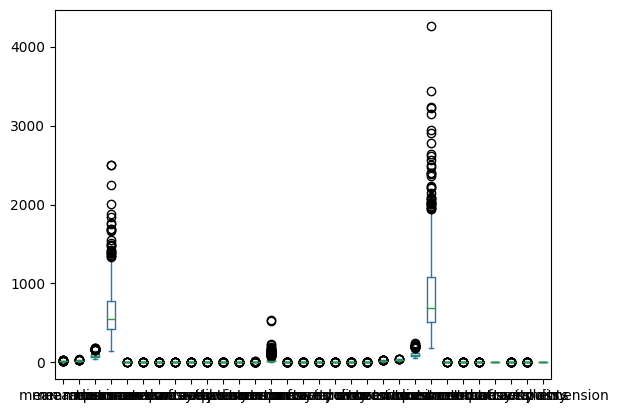

In [ ]:
# box and whisker plots
df_bc.plot(kind='box')
plt.show()

In [ ]:
# # box and whisker plots
# dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# plt.show()

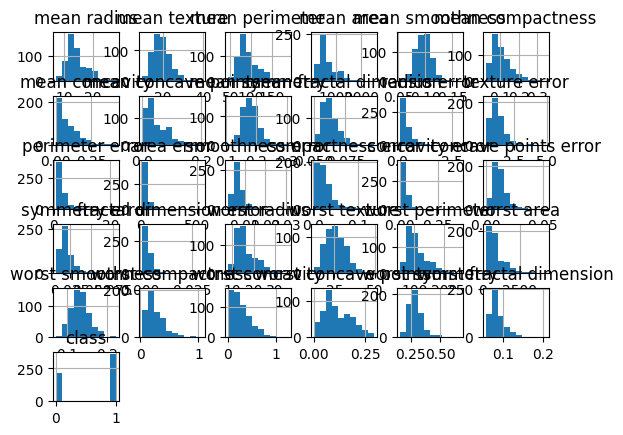

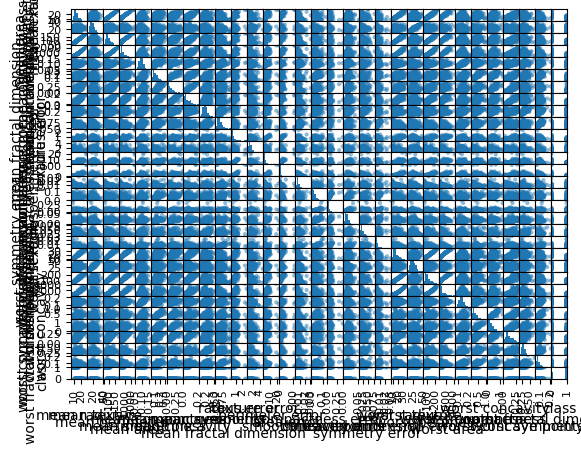

In [ ]:
# histograms
df_bc.hist()
plt.show()
# scatter plot matrix
pd.plotting.scatter_matrix(df_bc)
plt.show()

### Model Building and Prediction

In [157]:
model = LogisticRegression(solver='liblinear', max_iter=10000)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.972027972027972
[[65  1]
 [ 3 74]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       0.99      0.96      0.97        77

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [152]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9440559440559441
[[62  4]
 [ 4 73]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.95      0.95      0.95        77

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [153]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9790209790209791
[[63  3]
 [ 0 77]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        66
           1       0.96      1.00      0.98        77

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [154]:
model = SVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.965034965034965
[[65  1]
 [ 4 73]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.99      0.95      0.97        77

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [155]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.965034965034965
[[65  1]
 [ 4 73]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.99      0.95      0.97        77

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



### Compare Algorithms

LR: 0.977543 (0.011327)
KNN: 0.970540 (0.018290)
CART: 0.953717 (0.021005)
RFC: 0.984527 (0.017194)
SVC: 0.973318 (0.014698)
GNB: 0.922887 (0.022993)


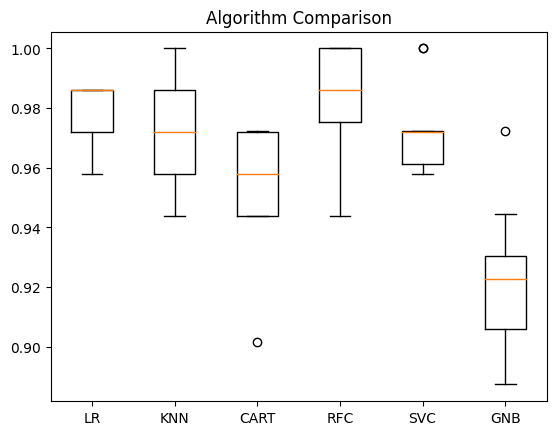

In [156]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', max_iter=10000, penalty='l2', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3,p=1)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVC', SVC()))
models.append(('GNB', GaussianNB()))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, scaler.fit_transform(X), y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()